In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_digits
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
epochs = 100
batch_size = 100

input_size = 2
bottleneck_size = 1
hidden_size = 20
layers = 10
# satisfactory performance with: hidden size = 20 layers = 10

In [3]:
class Autoencoder(nn.Module):
    def __init__(self, input_size = 2, \
                 bottleneck_size = 1,
                 hidden_size = 10, layers = 2):
        super(Autoencoder, self).__init__()
        # self.input_size = input_size
        # self.bottleneck_size = bottleneck_size
        # self.hidden_size = hidden_size
        # self.layers = layers
        encoder_mod = [
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            ]
        decoder_mod = [
            nn.Linear(bottleneck_size, hidden_size),
            nn.ReLU(),
        ]
        for _ in range(layers):
            encoder_mod.append(nn.Linear(hidden_size,hidden_size))
            encoder_mod.append(nn.ReLU())
            decoder_mod.append(nn.Linear(hidden_size,hidden_size))
            decoder_mod.append(nn.ReLU())
        encoder_mod += [nn.Linear(hidden_size, bottleneck_size), nn.ReLU()]
        decoder_mod += [nn.Linear(hidden_size, input_size)]
        self.encoder = nn.Sequential(*encoder_mod)
        self.decoder = nn.Sequential(*decoder_mod)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [4]:
X, _ = make_moons(n_samples=1000, noise=0.1)
autoencoder = Autoencoder(input_size = input_size, \
                 bottleneck_size = bottleneck_size,
                 hidden_size = hidden_size, layers = layers)
loss = nn.MSELoss()
train_loader = DataLoader(dataset = torch.from_numpy(X), batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder.parameters())

In [5]:
for epoch in range(epochs):
    for data in train_loader:
        inputs = data.float()
        
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss_val = loss(outputs, inputs)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/100], Loss: 0.5184
Epoch [2/100], Loss: 0.5849
Epoch [3/100], Loss: 0.5639
Epoch [4/100], Loss: 0.4924
Epoch [5/100], Loss: 0.5156
Epoch [6/100], Loss: 0.5480
Epoch [7/100], Loss: 0.5246
Epoch [8/100], Loss: 0.4442
Epoch [9/100], Loss: 0.4849
Epoch [10/100], Loss: 0.4854
Epoch [11/100], Loss: 0.5088
Epoch [12/100], Loss: 0.4875
Epoch [13/100], Loss: 0.4532
Epoch [14/100], Loss: 0.4939
Epoch [15/100], Loss: 0.5366
Epoch [16/100], Loss: 0.5142
Epoch [17/100], Loss: 0.5059
Epoch [18/100], Loss: 0.5359
Epoch [19/100], Loss: 0.5642
Epoch [20/100], Loss: 0.4858
Epoch [21/100], Loss: 0.5459
Epoch [22/100], Loss: 0.5040
Epoch [23/100], Loss: 0.5022
Epoch [24/100], Loss: 0.4613
Epoch [25/100], Loss: 0.5396
Epoch [26/100], Loss: 0.4541
Epoch [27/100], Loss: 0.5275
Epoch [28/100], Loss: 0.5522
Epoch [29/100], Loss: 0.5036
Epoch [30/100], Loss: 0.4563
Epoch [31/100], Loss: 0.5127
Epoch [32/100], Loss: 0.4723
Epoch [33/100], Loss: 0.5011
Epoch [34/100], Loss: 0.4681
Epoch [35/100], Loss: 0

Sometimes the loss decreases in a stable speed, while at certain times the loss does not decrease at all when the size of the neural network becomes too large.

In [6]:
# visualize effect of autoencoder
def plot_images(original, reconstructed):
    for i in range(len(original)):
        # print(original[i].numpy())
        plt.scatter(original[i].numpy()[0],original[i].numpy()[1], \
                    c = '#1f77b4')
        plt.scatter(reconstructed[i].numpy()[0], \
                    reconstructed[i].numpy()[1], c = '#ff7f0e')
    plt.show()

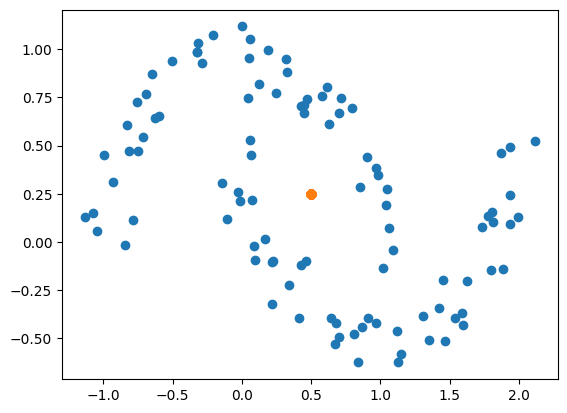

In [7]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.1)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

In [8]:
def histogram(X, BINS, visualize = False):
    # Create a 2D histogram
    hist, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=BINS)
    # reserve the pdf for later use
    pdf = hist / hist.sum()
    if visualize:# Visualize the histogram
        plt.imshow(pdf, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
        plt.colorbar()
        plt.show()
    return pdf

In [9]:
# sample uniformly from the space
sample_temp_x = torch.from_numpy(np.random.uniform(
    low = [-1.5,-1],
    high = [2.5, 2], 
    size = (1000,2))).float()
sample_temp_x = autoencoder(sample_temp_x).detach().numpy()

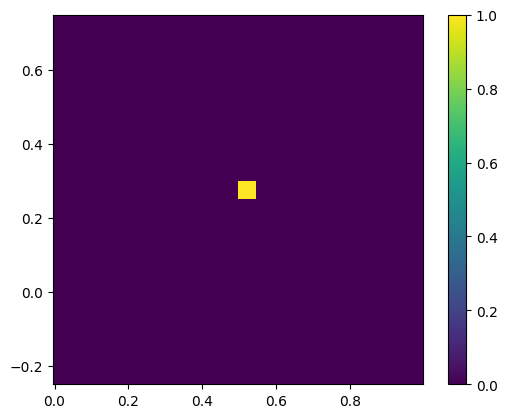

In [10]:
hist = histogram(sample_temp_x, 20, visualize = True)

In [11]:
from sklearn import mixture

In [12]:
# TODO: fit GMM to the code dist. 
mixture.GaussianMixture

sklearn.mixture._gaussian_mixture.GaussianMixture

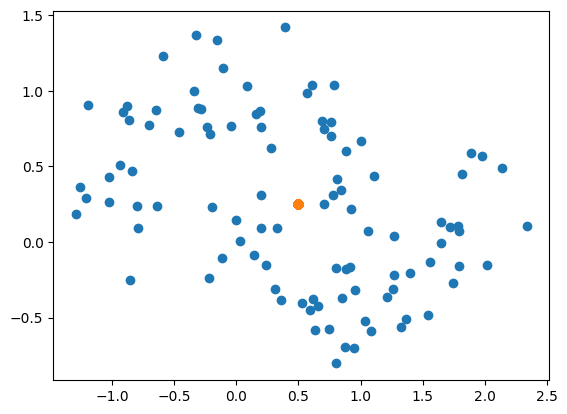

In [13]:
# noise level 0.2
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

In [14]:
# noise level 0.2: retraining
X_2, _ = make_moons(n_samples=1000, noise=0.2)
autoencoder_2 = Autoencoder(input_size = input_size, \
                 bottleneck_size = bottleneck_size,
                 hidden_size = 20, layers = layers)
loss = nn.MSELoss()
train_loader = DataLoader(dataset = X_2, batch_size = batch_size, shuffle = True)
optimizer = optim.Adam(autoencoder_2.parameters())
for epoch in range(epochs):
    for data in train_loader:
        inputs = data.float()
        optimizer.zero_grad()
        #print(inputs)
        outputs = autoencoder_2(inputs)
        loss_val = loss(outputs, inputs)
        loss_val.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/100], Loss: 0.5888
Epoch [2/100], Loss: 0.5200
Epoch [3/100], Loss: 0.5576
Epoch [4/100], Loss: 0.5264
Epoch [5/100], Loss: 0.5850
Epoch [6/100], Loss: 0.5488
Epoch [7/100], Loss: 0.5637
Epoch [8/100], Loss: 0.5301
Epoch [9/100], Loss: 0.5397
Epoch [10/100], Loss: 0.5493
Epoch [11/100], Loss: 0.6356
Epoch [12/100], Loss: 0.5077
Epoch [13/100], Loss: 0.4704
Epoch [14/100], Loss: 0.4815
Epoch [15/100], Loss: 0.5200
Epoch [16/100], Loss: 0.5265
Epoch [17/100], Loss: 0.5542
Epoch [18/100], Loss: 0.5260
Epoch [19/100], Loss: 0.5790
Epoch [20/100], Loss: 0.5373
Epoch [21/100], Loss: 0.5544
Epoch [22/100], Loss: 0.4280
Epoch [23/100], Loss: 0.3388
Epoch [24/100], Loss: 0.3094
Epoch [25/100], Loss: 0.2648
Epoch [26/100], Loss: 0.2564
Epoch [27/100], Loss: 0.1989
Epoch [28/100], Loss: 0.2015
Epoch [29/100], Loss: 0.1723
Epoch [30/100], Loss: 0.1207
Epoch [31/100], Loss: 0.1280
Epoch [32/100], Loss: 0.0857
Epoch [33/100], Loss: 0.1071
Epoch [34/100], Loss: 0.1085
Epoch [35/100], Loss: 0

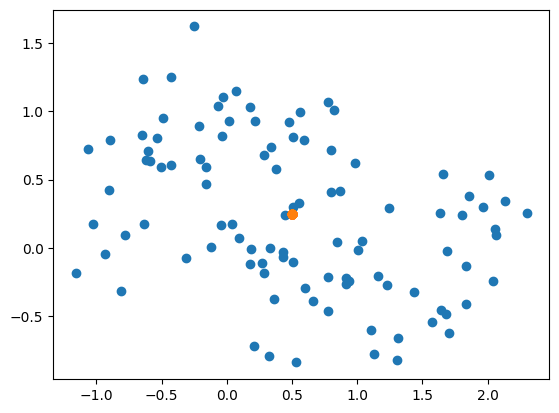

In [15]:
with torch.no_grad():
    test_data, _ = make_moons(n_samples=100, noise=0.2)
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder(test_data)
    plot_images(test_data, recon_data)

2. 2d without bottleneck

<h2>3 Higher-dimensional data</h2>

In [83]:
X = load_digits().data
input_size = 64
hidden_size = 128
layers = 5

loss = nn.MSELoss()
train_loader = DataLoader(dataset = torch.from_numpy(X), batch_size = batch_size, shuffle = True)


In [84]:
loss_values = []
num_experiments = 4
for bottleneck_size in range(14):
    loss_sum = 0
    for _ in range(num_experiments):
        autoencoder = Autoencoder(input_size = input_size, \
                    bottleneck_size = bottleneck_size,
                    hidden_size = hidden_size, layers = layers)
        
        optimizer = optim.Adam(autoencoder.parameters())
        for epoch in range(epochs):
            for data in train_loader:
                inputs = data.float()
                
                optimizer.zero_grad()
                outputs = autoencoder(inputs)
                loss_val = loss(outputs, inputs)
                loss_val.backward()
                optimizer.step()
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')
        loss_sum += float(loss_val.detach())
    loss_values.append(loss_sum/num_experiments)
print(loss_values)

/Users/maxhirsch/.ml/lib/python3.11/site-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch [1/100], Loss: 56.7795
Epoch [2/100], Loss: 23.3930
Epoch [3/100], Loss: 19.5334
Epoch [4/100], Loss: 19.5840
Epoch [5/100], Loss: 18.9526
Epoch [6/100], Loss: 18.7797
Epoch [7/100], Loss: 18.4880
Epoch [8/100], Loss: 19.0765
Epoch [9/100], Loss: 18.6813
Epoch [10/100], Loss: 18.4557
Epoch [11/100], Loss: 19.3350
Epoch [12/100], Loss: 19.3236
Epoch [13/100], Loss: 18.4150
Epoch [14/100], Loss: 18.0887
Epoch [15/100], Loss: 19.1715
Epoch [16/100], Loss: 18.8719
Epoch [17/100], Loss: 18.8756
Epoch [18/100], Loss: 18.8607
Epoch [19/100], Loss: 19.0961
Epoch [20/100], Loss: 18.9998
Epoch [21/100], Loss: 18.4193
Epoch [22/100], Loss: 19.3916
Epoch [23/100], Loss: 18.8652
Epoch [24/100], Loss: 18.6283
Epoch [25/100], Loss: 18.0927
Epoch [26/100], Loss: 19.5582
Epoch [27/100], Loss: 18.9110
Epoch [28/100], Loss: 18.4194
Epoch [29/100], Loss: 18.7034
Epoch [30/100], Loss: 18.2519
Epoch [31/100], Loss: 18.5118
Epoch [32/100], Loss: 18.9111
Epoch [33/100], Loss: 19.0030
Epoch [34/100], Los

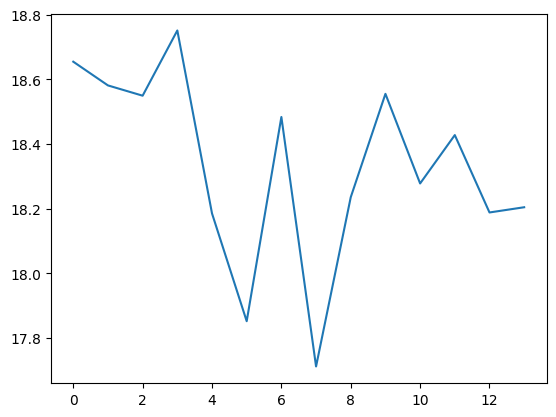

In [85]:
# visualize

plt.plot(loss_values)


In [81]:
# train networks with bottleneck size 2, 4, 8

autoencoder2 = Autoencoder(input_size = input_size, \
                        bottleneck_size = 2,
                        hidden_size = hidden_size, layers = layers)

autoencoder4 = Autoencoder(input_size = input_size, \
                        bottleneck_size = 4,
                        hidden_size = hidden_size, layers = layers)

autoencoder8 = Autoencoder(input_size = input_size, \
                        bottleneck_size = 16,
                        hidden_size = hidden_size, layers = layers)

for autoencoder in [autoencoder8]:#2, autoencoder4, autoencoder8]:
            
    optimizer = optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for data in train_loader:
            inputs = data.float()
            
            optimizer.zero_grad()
            outputs = autoencoder(inputs)
            loss_val = loss(outputs, inputs)
            loss_val.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_val.item():.4f}')

Epoch [1/100], Loss: 31.6691
Epoch [2/100], Loss: 19.4906
Epoch [3/100], Loss: 18.6879
Epoch [4/100], Loss: 18.1819
Epoch [5/100], Loss: 18.6058
Epoch [6/100], Loss: 18.1405
Epoch [7/100], Loss: 17.7158
Epoch [8/100], Loss: 18.1782
Epoch [9/100], Loss: 18.3497
Epoch [10/100], Loss: 18.5404
Epoch [11/100], Loss: 17.8604
Epoch [12/100], Loss: 18.8612
Epoch [13/100], Loss: 18.1469
Epoch [14/100], Loss: 18.3959
Epoch [15/100], Loss: 18.3670
Epoch [16/100], Loss: 18.2368
Epoch [17/100], Loss: 18.1132
Epoch [18/100], Loss: 17.9709
Epoch [19/100], Loss: 18.1381
Epoch [20/100], Loss: 17.9067
Epoch [21/100], Loss: 18.1343
Epoch [22/100], Loss: 18.8768
Epoch [23/100], Loss: 18.8329
Epoch [24/100], Loss: 18.0655
Epoch [25/100], Loss: 18.0901
Epoch [26/100], Loss: 18.2487
Epoch [27/100], Loss: 18.5214
Epoch [28/100], Loss: 18.4379
Epoch [29/100], Loss: 18.0552
Epoch [30/100], Loss: 18.8964
Epoch [31/100], Loss: 18.2637
Epoch [32/100], Loss: 18.0991
Epoch [33/100], Loss: 18.5639
Epoch [34/100], Los

tensor([-9.6301e-04, -4.2868e-02, -1.0221e+00, -2.3105e+00, -2.3597e+00,
        -1.1037e+00, -1.8317e-01,  2.5497e-02, -5.1688e-03, -3.5674e-01,
        -2.0680e+00, -2.3187e+00, -2.0542e+00, -1.6405e+00, -3.2892e-01,
        -6.5894e-03,  3.1305e-03, -4.5319e-01, -1.9745e+00, -1.3847e+00,
        -1.4841e+00, -1.5534e+00, -3.0355e-01,  2.1380e-02, -1.0145e-02,
        -4.1744e-01, -1.7430e+00, -1.8084e+00, -2.0370e+00, -1.4474e+00,
        -3.7907e-01, -8.0331e-03, -6.4215e-03, -3.6695e-01, -1.4428e+00,
        -1.8475e+00, -2.0149e+00, -1.6613e+00, -5.0241e-01, -1.3347e-03,
        -3.0902e-03, -2.6337e-01, -1.3335e+00, -1.3826e+00, -1.4759e+00,
        -1.6362e+00, -6.3282e-01,  9.4081e-03,  1.7732e-03, -1.4111e-01,
        -1.4972e+00, -1.8298e+00, -1.8942e+00, -1.7312e+00, -6.4312e-01,
        -2.1629e-02, -1.6655e-02, -1.1101e-02, -1.0545e+00, -2.3769e+00,
        -2.3411e+00, -1.2760e+00, -2.9567e-01, -2.6481e-02])
tensor([-1.5120e-02,  2.3326e-01,  4.6100e+00,  1.0451e+01,  1.

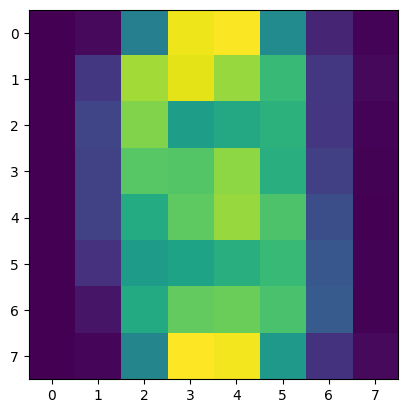

In [82]:
# reconstruct some digits:
with torch.no_grad():
    test_data = load_digits().data
    test_data = torch.from_numpy(test_data).float()
    recon_data = autoencoder8(test_data)
    print(recon_data[0]-recon_data[1])
    print(recon_data[0])
    print(recon_data[1])
    plt.imshow(recon_data[0].reshape(8,8))
    # ???
    # plot_images(test_data, recon_data)

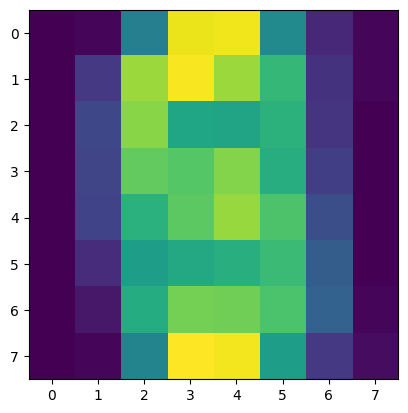

In [79]:
# quality of reconstruction as a function of bottleneck size
# can one recognize the labels in reconstruction?
# 
plt.imshow(recon_data[1].reshape(8,8))